In [1]:
import pymetheus
from pymetheus.pymetheus import LogicNet
import numpy as np
ll = LogicNet()

In [2]:
print(pymetheus.__version__)
ll.constant('John', definition=np.random.normal(0,.1,size=2))
ll.constant('Jim', definition=np.random.normal(0,.1,size=2))
ll.constant('Jack', definition=np.random.normal(0,.1,size=2))
ll.constant('Mary', definition=np.random.normal(1,.1,size=2))
ll.constant('Meggy', definition=np.random.normal(1,.1,size=2))
ll.constant('Mina', definition=np.random.normal(1,.1,size=2))

0.1.0


In [3]:
ll.constant('Person1', definition=np.random.normal(0.5,.1,size=2), optimize=True)
ll.constant('Person2', definition=np.random.normal(0.5,.1,size=2), optimize=True)

In [4]:
for a,b in ll.constants.items():
    print(a,b)
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
print(values_of_constants)
print(values_of_constants[:3,0])

John tensor([-0.0022,  0.0144])
Jim tensor([-0.0192,  0.1195])
Jack tensor([-0.1063, -0.0272])
Mary tensor([1.0790, 0.9038])
Meggy tensor([0.9018, 0.9257])
Mina tensor([1.0725, 0.8547])
Person1 tensor([0.4813, 0.5538], requires_grad=True)
Person2 tensor([0.4274, 0.4005], requires_grad=True)
[[-0.00220623  0.01436979]
 [-0.01917734  0.11952951]
 [-0.10625189 -0.02715477]
 [ 1.0789624   0.90378386]
 [ 0.9017805   0.9256952 ]
 [ 1.0724937   0.85466415]
 [ 0.48132712  0.5538364 ]
 [ 0.42738426  0.40049222]]
[-0.00220623 -0.01917734 -0.10625189]


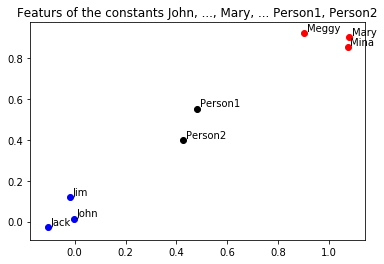

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')

plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [6]:
ll.predicate('Male', arity=1, argument_size = 2) # A is a unary predicate on objects with 2 features
ll.predicate('Female', arity=1, argument_size = 2) # B is a unary predicato on objects with 2 features
ll.predicate('CanPlayWith', arity=2, argument_size = 2) # R is a binary relation on objects with 2 features 

In [7]:
print(ll.reason('Male(John)'))
print(ll.reason('Female(John)'))
print(ll.reason('Male(Jack)'))
print(ll.reason('Female(Mary)'))
print(ll.reason('CanPlayWith(John,Mary)'))

0.57251513
0.51511955
0.5819664
0.5335808
0.48964936


In [8]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])
men

array([[0.57251513],
       [0.56861085],
       [0.5819664 ],
       [0.63117   ],
       [0.622313  ],
       [0.6252684 ],
       [0.5725474 ],
       [0.56262815]], dtype=float32)

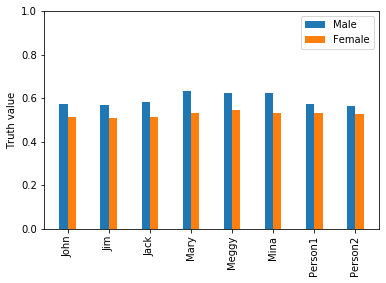

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

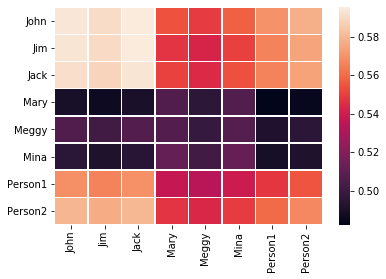

In [10]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [11]:
ll.knowledge("Male(John)")
ll.knowledge("Male(Jack)")
ll.knowledge('~Male(Mary)')
ll.knowledge('~Male(Meggy)')
ll.knowledge('Female(Mary)')
ll.knowledge('Female(Meggy)')
ll.knowledge('~Female(John)')
ll.knowledge('~Female(Jack)')
ll.knowledge('CanPlayWith(John,Mary)')
ll.knowledge('CanPlayWith(Meggy,Jack)')
ll.knowledge('~CanPlayWith(Meggy,Mary)')
ll.knowledge('~CanPlayWith(Jim,Jack)')
ll.knowledge('CanPlayWith(Person1,Jim)')
ll.knowledge('CanPlayWith(Person2,Mina)')

In [12]:
ll.reason("CanPlayWith(Meggy,Mary)")

0.49587053

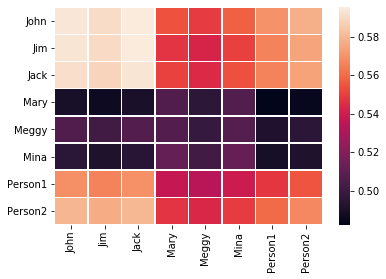

In [13]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [14]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

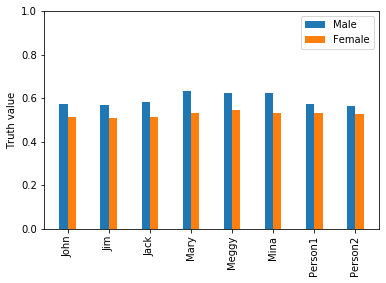

In [15]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

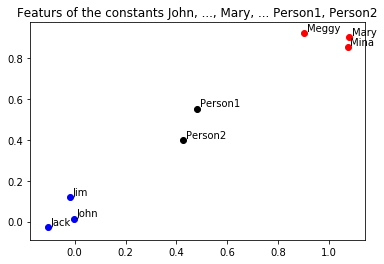

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [17]:
domain_of_variables = np.random.uniform(0,1,size=(100,2))
ll.variable('?x', domain_of_variables, labelled=False)
ll.variable('?y', domain_of_variables, labelled=False)


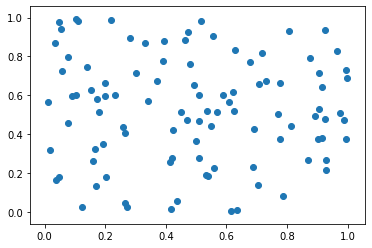

In [18]:
plt.scatter(domain_of_variables[:,0],domain_of_variables[:,1])
plt.show()

In [21]:
ll.universal_rule('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

ll.universal_rule('forall ?x,?y: ((Male(?x) & Female(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: ((Female(?x) & Male(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: (CanPlayWith(?x,?y) -> CanPlayWith(?y,?x))')
ll.universal_rule('forall ?x: (Male(?x) % ~Female(?x))')




In [22]:
ll.reason('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

array(1., dtype=float32)

In [23]:
ll.fit(epochs=1000, grouping=1000)

Current Satisfiability 0.989956):  14%|█▍        | 142/1000 [03:23<20:18,  1.42s/it]

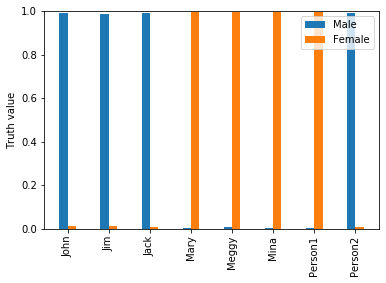

In [24]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

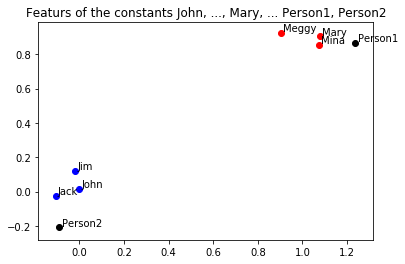

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


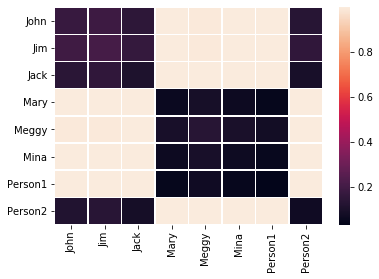

In [26]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [ ]:
ll.reason("CanPlayWith(Person2,Person2)")

In [ ]:
import torch

ll.function('opponent',2,2) 

class equal_simple(torch.nn.Module):

    def __init__(self):
        super(equal_simple, self).__init__()
        self.system = False

    def forward(self, x, y):
        delta = torch.nn.PairwiseDistance()(x,y)
        similarity = torch.exp(-delta).reshape(-1,1)
        return similarity

In [ ]:
ll.predicate("equal", network=equal_simple())


In [ ]:
ll.universal_rule('forall ?x:CanPlayWith(?x,opponent(?x))')
ll.universal_rule('forall ?x:(Male(?x) % Female(opponent(?x)))')
ll.universal_rule('forall ?x:(Female(?x) % Male(opponent(?x)))')

ll.universal_rule('forall ?x,?y: equal(opponent(?x),?y) -> equal(opponent(?y),?x)')

ll.knowledge('equal(opponent(John),Mary)')
ll.knowledge('equal(opponent(Mina),Jack)')
ll.knowledge('equal(opponent(Meggy),Person2)')

In [ ]:
ll.learn(epochs=1000, batch_size=1000)